In [1]:
import pandas as pd
import numpy as np

import sklearn.cluster as cluster
from sklearn.cluster import KMeans
from sklearn import neighbors
from sklearn.model_selection import train_test_split

import matplotlib.pyplot as plt
from matplotlib import style
style.use('ggplot')
import seaborn as sns
import beautiful_plots

In [2]:
df = pd.read_csv('peta_sept2021_5k.csv')  

In [3]:
j=1

for i in range(0, df.shape[0]):
    print(str(j) + '. ' + df['tweets'][i] + '\n')
    j += 1

1.  This cruel... Why do human in this fucking room feel nothing... They are evil not human😡😡😡😡😡😡😡

2.  Please to share and to help Heroes of K9 Dogs out of Afghanistan soon later 🙏🙏

3.  💔💔😔

4.  Stop 🛑 this now !!!!😡😡💔💔💔😭😭😡😡

5.  Name them so we can shame them!!!!

6.  Great name, Charlene

7.  what are they doing btw

8.    Yummy yummy milky

9.  Experiment or torture?

10.   https//t.co/EqIoO6QxCH

11.   this post single handedly inspired me to order a box of chicken nuggets from mcdonald’s rn

12.   We dont stan not a nugget in this community https//t.co/5aYO9h4fqW

13.  Look at me, I'm killing pigs. https//t.co/0BGq9pud2j

14.   do you have branch office in Denmark? https//t.co/DYOiZBRpjC

15.  Peta Eats children and loves shooting animals loves making steak and forces children to eat legos

16.    Looks hot

17.   How he enters the battlefield https//t.co/gBoBfuIiEr

18.   The Ocean

19.  Hello nasty!

20.  I read that a humane group brought them home?

21.   Oh boy, can't wait 

TypeError: can only concatenate str (not "float") to str

# Clustering
### K-Means : 5 centroids

In [4]:
kmeans = cluster.KMeans(n_clusters=5, init='k-means++')
kmeans = kmeans.fit(df[['Subjectivity', 'Polarity']])

In [5]:
kmeans.cluster_centers_

array([[ 0.01208901,  0.00185471],
       [ 0.5855015 ,  0.16172462],
       [ 0.90824018, -0.64244776],
       [ 0.69804096,  0.62003727],
       [ 0.56387266, -0.24715794]])

In [8]:
df['Clusters'] = kmeans.labels_

In [9]:
df['Clusters'].value_counts()
df

,tweets,Subjectivity,Polarity,Analysis,Clusters
0,This cruel... Why do human in this fucking ro...,0.725000,-0.650000,-1,2
1,Please to share and to help Heroes of K9 Dogs...,0.000000,0.000000,0,0
2,💔💔😔,0.000000,0.000000,0,0
3,Stop 🛑 this now !!!!😡😡💔💔💔😭😭😡😡,0.000000,0.000000,0,0
4,Name them so we can shame them!!!!,0.000000,0.000000,0,0
...,...,...,...,...,...
4503,Oh my good god!! That’s disturbing…..,0.600000,1.000000,1,3
4504,It's shocking horse and carriage racing is st...,0.557143,-0.321429,-1,4
4505,I like milk and steak veganism is bad,0.666667,-0.700000,-1,2
4506,Will some peta volunteers come forward for so...,1.000000,0.300000,1,1


<AxesSubplot:xlabel='Subjectivity', ylabel='Polarity'>

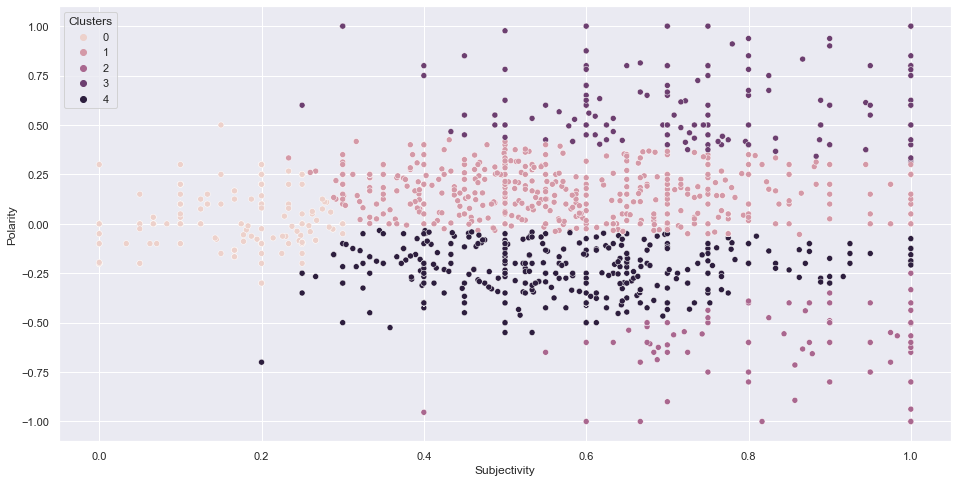

In [10]:
sns.set(rc={"figure.figsize":(16, 8)})
sns.scatterplot(x='Subjectivity', y='Polarity', hue='Clusters', data=df)

### KNN Classifier using the 5 identified clusters

In [11]:
subjectivity = df.iloc[:, 1].values
polarity = df.iloc[:, 2].values

X = list(zip(subjectivity, polarity))
X = np.array(X)
y = df.iloc[:, 4].values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20)

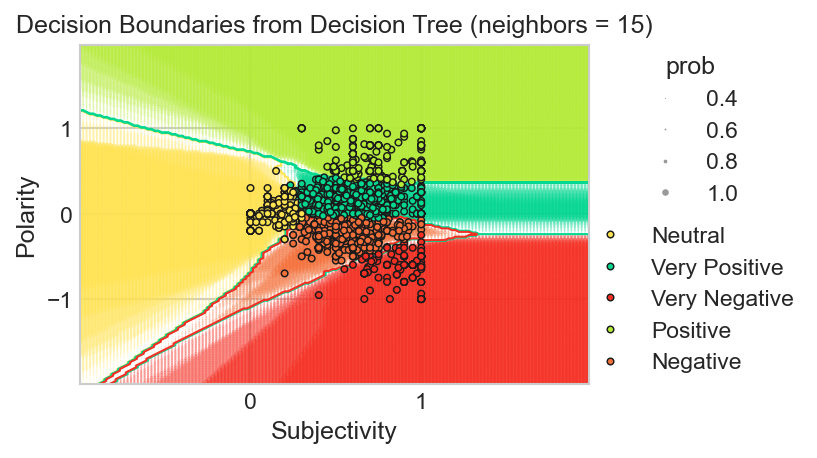

In [35]:
N_NEIGHBORS = 15 # KNN number of neighbors
H = 0.02 # mesh stepsize
PROB_DOT_SCALE = 10 # modifier to scale the probability dots
PROB_DOT_SCALE_POWER = 5 # exponential used to increase/decrease size of prob dots
TRUE_DOT_SIZE = 10 # size of the true labels
PAD = 1 # how much to "pad" around the true labelsF5A200

# establish colors and colormap
palette = ['#FFE350', '#01D790', '#F52F23', '#B4EB36', '#F4703A']
colormap = np.array(palette)

#establish classes
classes = ['Neutral','Very Positive','Very Negative', 'Positive', 'Negative']

knn = neighbors.KNeighborsClassifier(N_NEIGHBORS, weights='uniform')
knn.fit(X_train, y_train)

# use function
beautiful_plots.plot_decision_boundary2D(knn, X_train, y_train.copy(), classes, colormap, 
                         step=H, 
                         prob_dot_scale=PROB_DOT_SCALE, 
                         prob_dot_scale_power=PROB_DOT_SCALE_POWER,
                         true_dot_size=TRUE_DOT_SIZE, 
                         pad=PAD,k=N_NEIGHBORS)

In [36]:
clusters_count = df['Clusters'].value_counts()
clusters_count

0    2710
1     644
4     456
3     428
2     270
Name: Clusters, dtype: int64

## Performance Indicators

In [37]:
from sklearn import metrics
from sklearn.metrics import precision_score
from sklearn.metrics import plot_confusion_matrix

In [38]:
y_pred = knn.predict(X_test)

In [39]:
print('True: ' + str(y_test[0:30]))
print('Pred: ' + str(y_pred[0:30]))
print('\nPrecision Score:\n' + str(precision_score(y_test, y_pred, average='weighted')) + '\n')
print('Recall Score:\n' + str(metrics.recall_score(y_test, y_pred, average='weighted')))

True: [2 0 2 0 1 3 1 0 0 0 0 3 0 1 1 1 0 1 1 0 0 0 0 2 1 4 0 0 1 1]
Pred: [2 0 2 0 1 3 1 0 0 0 0 3 0 1 1 1 0 1 1 0 0 0 0 2 1 4 0 0 1 1]

Precision Score:
0.9933704506875239

Recall Score:
0.9933481152993349


## Confusion Matrix

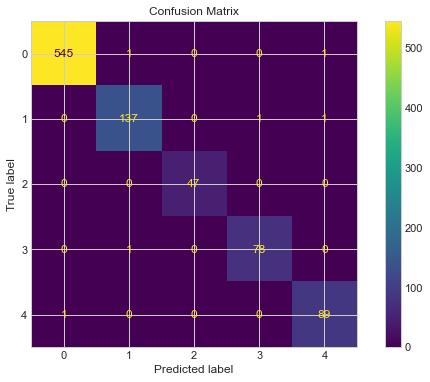

In [40]:
matrix = plot_confusion_matrix(knn, X_test, y_test)
matrix.ax_.set_title('Confusion Matrix')
plt.gcf().set_size_inches(10, 6)

# print(metrics.confusion_matrix(y_test, y_pred))